We have 125 days 01:56:45 worth of data for this one:
Points=1581 Min=9.9962831 Max=9.996290400000001 Mean=9.996287658127786 Std=1.1002612055156523e-06


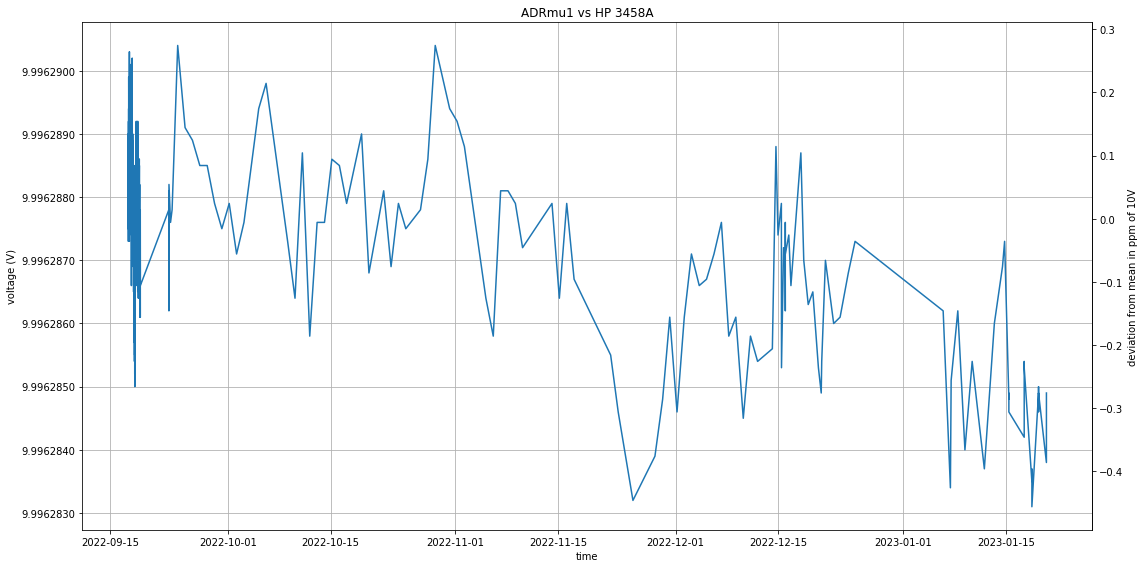

In [91]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


columns = ["Time", "3458A"]
raw=pd.read_csv("https://raw.githubusercontent.com/marcoreps/multiinstrumentalist/master/csv/ADRmu1-3458A.csv", usecols=columns)

raw[columns[0]] = pd.to_datetime(raw[columns[0]])
print("We have "+str(raw[columns[0]].max() - raw[columns[0]].min())+" worth of data for this one:")
print("Points="+str(raw[columns[1]].count())+" \
Min="+str(raw[columns[1]].min())+" \
Max="+str(raw[columns[1]].max())+" \
Mean="+str(raw[columns[1]].mean())+" \
Std="+str(raw[columns[1]].std()))


def to_ppm(x):
    return (x-raw[columns[1]].mean())/.00001

def from_ppm(x):
    return x*.00001+raw[columns[1]].mean()

plt.rcParams["figure.figsize"] = [16, 8]
fig, ax = plt.subplots()
ax.grid()
ax.set(xlabel='time', ylabel='voltage (V)',
       title='ADRmu1 vs HP 3458A')


raw = raw.set_index(pd.DatetimeIndex(raw[columns[0]]))
raw = raw.drop('Time', axis=1)
ax.plot(raw)
secax = ax.secondary_yaxis('right', functions=(to_ppm, from_ppm))
secax.set_ylabel('deviation from mean in ppm of 10V')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.7f'))

plt.show()
